In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HourlyWeatherData - HourlyWeatherData.csv')
df.columns

Index(['Date', 'Time', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)',
       'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)',
       'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)',
       'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)',
       'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)'],
      dtype='object')

In [4]:
df_visibility = df[['Date','Temp (F)', 'RH (%)', 'Visibility (mi)']]
df_visibility.shape

(90780, 4)

In [5]:
df_visibility['Visibility (mi)'] = df_visibility['Visibility (mi)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df_visibility['Temp (F)'] = df_visibility['Temp (F)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df_visibility['RH (%)'] = df_visibility['RH (%)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df_visibility['Visibility (mi)'] = df_visibility['Visibility (mi)'].astype(int)
df_visibility['Temp (F)'] = df_visibility['Temp (F)'].astype(int)
df_visibility['RH (%)'] = df_visibility['RH (%)'].astype(int)

In [6]:
df_group = pd.DataFrame(df_visibility.groupby(['Date']).mean())
df_group = df_group.reset_index()
df_group['Date'] = pd.to_datetime(df_group['Date'])
march_mask = df_group['Date'].map(lambda x: x.month) == 3
df_group = df_group[march_mask]
df_group['Date'] = df_group['Date'].astype(str)
df_group.columns

Index(['Date', 'Temp (F)', 'RH (%)', 'Visibility (mi)'], dtype='object')

In [7]:
df_group.shape

(341, 4)

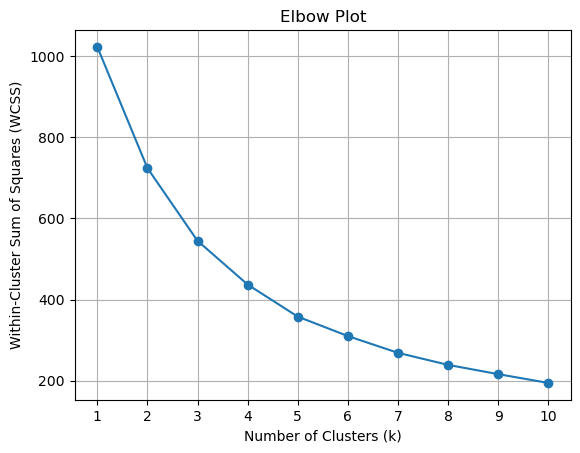

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Extract features (temperature, humidity, visibility)
X = df_group[['Temp (F)', 'RH (%)', 'Visibility (mi)']].values

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


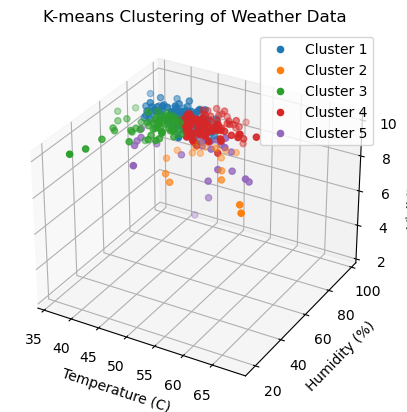

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Extract features (temperature, humidity, visibility)
X = df_group[['Temp (F)', 'RH (%)', 'Visibility (mi)']].values

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
n_clusters = 5  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(n_clusters):
    ax.scatter(X[clusters == cluster_id, 0], X[clusters == cluster_id, 1], X[clusters == cluster_id, 2],
               label=f'Cluster {cluster_id+1}')

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Visibility (km)')
ax.set_title('K-means Clustering of Weather Data')
ax.legend()

plt.show()


In [10]:
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_group['Cluster'] = clusters

# Print DataFrame with cluster assignments
print(df_group)

            Date   Temp (F)     RH (%)  Visibility (mi)  Cluster
59    2014-03-01  42.250000  60.833333        10.000000        2
60    2014-03-02  42.125000  87.041667         6.625000        4
61    2014-03-03  51.125000  82.500000         8.083333        4
62    2014-03-04  51.166667  88.416667         6.375000        4
63    2014-03-05  54.416667  87.708333         6.083333        4
...          ...        ...        ...              ...      ...
3738  2024-03-27  46.541667  78.875000         8.458333        0
3739  2024-03-28  46.666667  71.125000         9.375000        3
3740  2024-03-29  49.125000  63.291667        10.000000        3
3741  2024-03-30  48.625000  65.666667        10.000000        3
3742  2024-03-31  50.250000  59.500000        10.000000        3

[341 rows x 5 columns]


In [11]:
df_group['Date'] = pd.to_datetime(df_group['Date'])
march_mask = df_group['Date'].map(lambda x: x.month) == 3
df_march = df_group[march_mask]

In [12]:
df_march

,Date,Temp (F),RH (%),Visibility (mi),Cluster
59,2014-03-01,42.250000,60.833333,10.000000,2
60,2014-03-02,42.125000,87.041667,6.625000,4
61,2014-03-03,51.125000,82.500000,8.083333,4
62,2014-03-04,51.166667,88.416667,6.375000,4
63,2014-03-05,54.416667,87.708333,6.083333,4
...,...,...,...,...,...
3738,2024-03-27,46.541667,78.875000,8.458333,0
3739,2024-03-28,46.666667,71.125000,9.375000,3
3740,2024-03-29,49.125000,63.291667,10.000000,3
3741,2024-03-30,48.625000,65.666667,10.000000,3


In [13]:
import pandas as pd

# Assuming your DataFrame is named df

# Extract day of the month from the 'Date' column
df_march['Day of Month'] = df_march['Date'].dt.day

# Group by 'Cluster' and calculate statistics
cluster_stats = df_march.groupby('Cluster').agg({
    'Day of Month': ['min', 'max', lambda x: x.max() - x.min()],
    'Temp (F)': ['min', 'max', lambda x: x.max() - x.min(), 'mean'],
    'RH (%)': ['min', 'max', lambda x: x.max() - x.min(), 'mean'],
    'Visibility (mi)': ['min', 'max', lambda x: x.max() - x.min(), 'mean']
})

# Rename columns for better readability
cluster_stats.columns = ['Day of Month Min', 'Day of Month Max', 'Day of Month Range',
                         'Temp (F) Min', 'Temp (F) Max', 'Temp (F) Range', 'Temp (F) Mean',
                         'RH (%) Min', 'RH (%) Max', 'RH (%) Range', 'RH (%) Mean',
                         'Visibility (mi) Min', 'Visibility (mi) Max', 'Visibility (mi) Range', 'Visibility (mi) Mean']

# Display the statistics for each cluster
print("Statistics for each cluster:")



Statistics for each cluster:


In [14]:
cluster_stats = cluster_stats.reset_index()
cluster_stats

,Cluster,Day of Month Min,Day of Month Max,Day of Month Range,Temp (F) Min,Temp (F) Max,Temp (F) Range,Temp (F) Mean,RH (%) Min,RH (%) Max,RH (%) Range,RH (%) Mean,Visibility (mi) Min,Visibility (mi) Max,Visibility (mi) Range,Visibility (mi) Mean
0,0,1,31,30,36.958333,49.333333,12.375000,43.893000,68.541667,87.875000,19.333333,79.275495,8.416667,10.00,1.583333,9.354225
1,1,11,31,20,50.708333,68.291667,17.583333,56.495370,18.333333,57.250000,38.916667,44.476852,9.916667,10.00,0.083333,9.995370
2,2,1,31,30,36.250000,48.708333,12.458333,43.584978,24.708333,72.000000,47.291667,61.073465,9.000000,10.00,1.000000,9.970395
3,3,1,31,30,46.208333,59.125000,12.916667,50.163991,57.416667,93.333333,35.916667,72.230505,8.416667,10.00,1.583333,9.788991
4,4,1,29,28,36.166667,54.652174,18.485507,45.235132,59.666667,98.125000,38.458333,85.154673,2.333333,8.25,5.916667,7.117129


In [15]:
cluster_stats.columns

Index(['Cluster', 'Day of Month Min', 'Day of Month Max', 'Day of Month Range',
       'Temp (F) Min', 'Temp (F) Max', 'Temp (F) Range', 'Temp (F) Mean',
       'RH (%) Min', 'RH (%) Max', 'RH (%) Range', 'RH (%) Mean',
       'Visibility (mi) Min', 'Visibility (mi) Max', 'Visibility (mi) Range',
       'Visibility (mi) Mean'],
      dtype='object')

In [16]:
import pandas as pd

# Assuming your DataFrame is named df

# Find the cluster with the highest temperature
max_temp_cluster = cluster_stats.loc[cluster_stats['Temp (F) Mean'].idxmax()]['Cluster']

# Find the cluster with the highest visibility
max_visibility_cluster = cluster_stats.loc[cluster_stats['Visibility (mi) Mean'].idxmax()]['Cluster']

# Find the cluster with the lowest humidity
min_humidity_cluster = cluster_stats.loc[cluster_stats['RH (%) Mean'].idxmin()]['Cluster']

# Find the intersection of clusters
selected_cluster = set([max_temp_cluster, max_visibility_cluster, min_humidity_cluster])

print("Cluster with highest temperature, highest visibility, and lowest humidity:", selected_cluster)


Cluster with highest temperature, highest visibility, and lowest humidity: {1.0}


In [17]:
cluster_1 = df_march[df_march['Cluster']==1]

In [18]:
cluster_1['Day of Month'] = cluster_1['Date'].dt.day
cluster_1 = cluster_1.sort_values(by=['Temp (F)','Visibility (mi)', 'RH (%)'], ascending=[False,False,True])

In [19]:
cluster_1

,Date,Temp (F),RH (%),Visibility (mi),Cluster,Day of Month
1903,2019-03-19,68.291667,18.333333,10.000000,1,19
1904,2019-03-20,66.958333,23.291667,10.000000,1,20
1902,2019-03-18,61.083333,35.875000,10.000000,1,18
1531,2018-03-12,59.750000,41.916667,10.000000,1,12
820,2016-03-31,58.875000,56.791667,10.000000,1,31
3728,2024-03-17,57.750000,50.458333,10.000000,1,17
3727,2024-03-16,57.208333,56.291667,10.000000,1,16
819,2016-03-30,55.708333,56.125000,10.000000,1,30
1915,2019-03-31,55.125000,57.250000,9.916667,1,31
807,2016-03-18,54.875000,24.958333,10.000000,1,18


In [20]:
cluster_1

,Date,Temp (F),RH (%),Visibility (mi),Cluster,Day of Month
1903,2019-03-19,68.291667,18.333333,10.000000,1,19
1904,2019-03-20,66.958333,23.291667,10.000000,1,20
1902,2019-03-18,61.083333,35.875000,10.000000,1,18
1531,2018-03-12,59.750000,41.916667,10.000000,1,12
820,2016-03-31,58.875000,56.791667,10.000000,1,31
3728,2024-03-17,57.750000,50.458333,10.000000,1,17
3727,2024-03-16,57.208333,56.291667,10.000000,1,16
819,2016-03-30,55.708333,56.125000,10.000000,1,30
1915,2019-03-31,55.125000,57.250000,9.916667,1,31
807,2016-03-18,54.875000,24.958333,10.000000,1,18


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df

# Initialize StandardScaler
scaler = MinMaxScaler()

# Scale the numeric columns (except 'Day of Month')
scaled_features = scaler.fit_transform(df_march.drop(columns=['Day of Month', 'Date', 'Cluster']))

In [22]:
df_march.drop(columns=['Day of Month', 'Date', 'Cluster'])

,Temp (F),RH (%),Visibility (mi)
59,42.250000,60.833333,10.000000
60,42.125000,87.041667,6.625000
61,51.125000,82.500000,8.083333
62,51.166667,88.416667,6.375000
63,54.416667,87.708333,6.083333
...,...,...,...
3738,46.541667,78.875000,8.458333
3739,46.666667,71.125000,9.375000
3740,49.125000,63.291667,10.000000
3741,48.625000,65.666667,10.000000


In [23]:
scaled_features

array([[0.18936446, 0.53263708, 1.        ],
       [0.18547341, 0.86109661, 0.55978261],
       [0.46562905, 0.80417755, 0.75      ],
       ...,
       [0.40337224, 0.56344648, 1.        ],
       [0.38780804, 0.59321149, 1.        ],
       [0.4383917 , 0.51592689, 1.        ]])

In [24]:
# Convert scaled_features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Temp (F)','Visibility (mi)', 'RH (%)'])

In [25]:
scaled_df

,Temp (F),Visibility (mi),RH (%)
0,0.189364,0.532637,1.000000
1,0.185473,0.861097,0.559783
2,0.465629,0.804178,0.750000
3,0.466926,0.878329,0.527174
4,0.568093,0.869452,0.489130
...,...,...,...
336,0.322957,0.758747,0.798913
337,0.326848,0.661619,0.918478
338,0.403372,0.563446,1.000000
339,0.387808,0.593211,1.000000


In [26]:
list(cluster_1.values)

[array([Timestamp('2019-03-19 00:00:00'), 68.29166666666667,
        18.333333333333332, 10.0, 1, 19], dtype=object),
 array([Timestamp('2019-03-20 00:00:00'), 66.95833333333333,
        23.291666666666668, 10.0, 1, 20], dtype=object),
 array([Timestamp('2019-03-18 00:00:00'), 61.083333333333336, 35.875, 10.0,
        1, 18], dtype=object),
 array([Timestamp('2018-03-12 00:00:00'), 59.75, 41.916666666666664, 10.0,
        1, 12], dtype=object),
 array([Timestamp('2016-03-31 00:00:00'), 58.875, 56.791666666666664, 10.0,
        1, 31], dtype=object),
 array([Timestamp('2024-03-17 00:00:00'), 57.75, 50.458333333333336, 10.0,
        1, 17], dtype=object),
 array([Timestamp('2024-03-16 00:00:00'), 57.208333333333336,
        56.291666666666664, 10.0, 1, 16], dtype=object),
 array([Timestamp('2016-03-30 00:00:00'), 55.708333333333336, 56.125, 10.0,
        1, 30], dtype=object),
 array([Timestamp('2019-03-31 00:00:00'), 55.125, 57.25, 9.916666666666666,
        1, 31], dtype=object),
 arra

In [27]:
day_of_month = list(df_march['Day of Month'].values)

In [28]:
# Add 'Day of Month' column back to the DataFrame
scaled_df['Day of Month'] = day_of_month
scaled_df = scaled_df.groupby('Day of Month').mean()
scaled_df = scaled_df.sort_values('Day of Month')


In [29]:
scaled_df = scaled_df.reset_index()

In [30]:
scaled_df['Day of Month'] = scaled_df['Day of Month'].astype(str)

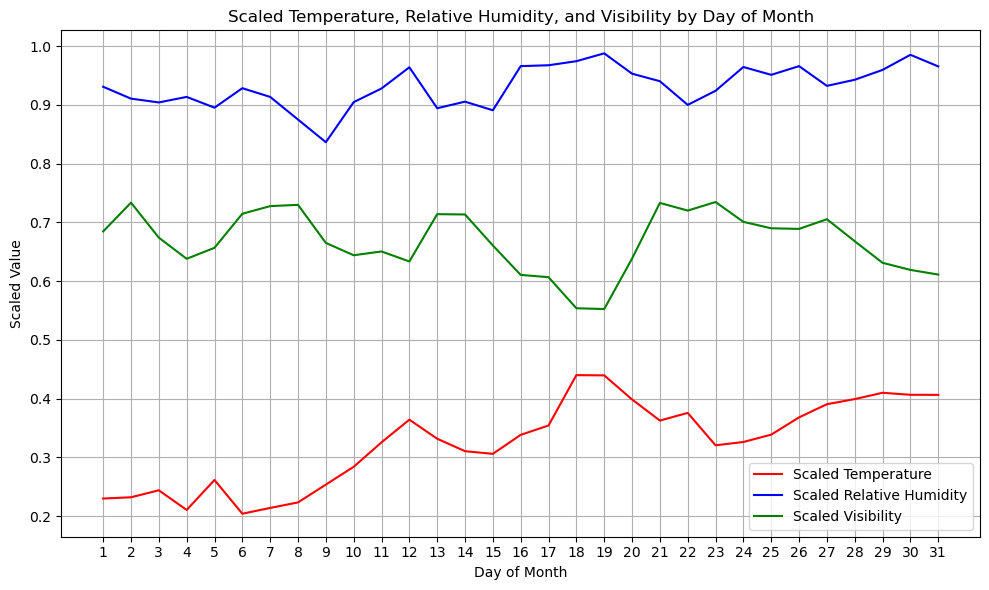

In [31]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot scaled temperature
plt.plot(scaled_df['Day of Month'], scaled_df['Temp (F)'], label='Scaled Temperature', color='red')

# Plot scaled relative humidity
plt.plot(scaled_df['Day of Month'], scaled_df['RH (%)'], label='Scaled Relative Humidity', color='blue')

# Plot scaled visibility
plt.plot(scaled_df['Day of Month'], scaled_df['Visibility (mi)'], label='Scaled Visibility', color='green')

# Add labels and title
plt.xlabel('Day of Month')
plt.ylabel('Scaled Value')
plt.title('Scaled Temperature, Relative Humidity, and Visibility by Day of Month')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()